Station data acquired from api; see [csianglim/weather-gc-ca-python](https://github.com/csianglim/weather-gc-ca-python/blob/master/Part%20I%20-%20Data%20Extraction%20and%20Cleaning.ipynb)

In [1]:
import numpy as np
import xarray as xr
import pandas as pd
from glob import glob

import matplotlib.pyplot as plt
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [ ]:
# Constants

FIRST_YEAR = 1999
LAST_YEAR = 2023
N_YEARS = LAST_YEAR - FIRST_YEAR + 1
N = 365 * 24 * N_YEARS + 6 * 24   # 24 extra hours for 6 leap years
COVERAGE_THRESHOLD = 0.9
ZSCORE_THRESHOLD = 4  # for outlier detection; may want to adjust (this seems to reject some plausible Wind Spd values, for instance)
vars = [
    "Temp (°C)",
    "Wind Spd (km/h)",
    "Stn Press (kPa)",
    "Rel Hum (%)",
    "Dew Point Temp (°C)",
]

In [ ]:
# Takes ~3 minutes to run

wx_data_fnames = sorted(glob("/users/rpayne/data/unproc/STN_ECCC/api/hourly/*.csv"))
df = pd.concat(
    (pd.read_csv(f, encoding='latin1', low_memory=False) for f in wx_data_fnames),
    ignore_index=True
)
df['Date/Time (LST)'] = pd.to_datetime(df['Date/Time (LST)'], format='%Y-%m-%d %H:%M:%S')
df = df[df['Date/Time (LST)'].dt.year >= FIRST_YEAR]  # Filter for data after FIRST_YEAR
df = df[df['Date/Time (LST)'].dt.year <= LAST_YEAR]  # Filter for data before LAST_YEAR
df.set_index('Date/Time (LST)', inplace=True)
df.rename(columns={"Temp (Â°C)": "Temp (°C)"}, inplace=True)
df.rename(columns={"Dew Point Temp (Â°C)": "Dew Point Temp (°C)"}, inplace=True)
df

Longitude (x)  Latitude (y)   Station Name Climate ID  \
Date/Time (LST)                                                              
1999-01-01 00:00:00        -119.44         49.03     OSOYOOS CS    1125852   
1999-01-01 01:00:00        -119.44         49.03     OSOYOOS CS    1125852   
1999-01-01 02:00:00        -119.44         49.03     OSOYOOS CS    1125852   
1999-01-01 03:00:00        -119.44         49.03     OSOYOOS CS    1125852   
1999-01-01 04:00:00        -119.44         49.03     OSOYOOS CS    1125852   
...                            ...           ...            ...        ...   
2023-12-31 19:00:00        -119.65         49.56  SUMMERLAND CS    112G8L1   
2023-12-31 20:00:00        -119.65         49.56  SUMMERLAND CS    112G8L1   
2023-12-31 21:00:00        -119.65         49.56  SUMMERLAND CS    112G8L1   
2023-12-31 22:00:00        -119.65         49.56  SUMMERLAND CS    112G8L1   
2023-12-31 23:00:00        -119.65         49.56  SUMMERLAND CS    112G8L1   

                     Year  Month  Day Time (LST) Flag  Temp (Â°C)  ...  \
Date/Time (LST)                                                    ...   
1999-01-01 00:00:00  1999      1    1      00:00  NaN         2.3  ...   
1999-01-01 01:00:00  1999      1    1      01:00  NaN         6.1  ...   
1999-01-01 02:00:00  1999      1    1      02:00  NaN         6.4  ...   
1999-01-01 03:00:00  1999      1    1      03:00  NaN         1.7  ...   
1999-01-01 04:00:00  1999      1    1      04:00  NaN         0.9  ...   
...                   ...    ...  ...        ...  ...         ...  ...   
2023-12-31 19:00:00  2023     12   31      19:00  NaN         3.5  ...   
2023-12-31 20:00:00  2023     12   31      20:00  NaN         3.4  ...   
2023-12-31 21:00:00  2023     12   31      21:00  NaN         2.7  ...   
2023-12-31 22:00:00  2023     12   31      22:00  NaN         2.2  ...   
2023-12-31 23:00:00  2023     12   31      23:00  NaN         2.9  ...   

                    Visibility Flag  Stn Press (kPa) Stn Press Flag  Hmdx  \
Date/Time (LST)                                                             
1999-01-01 00:00:00               M              NaN              M   NaN   
1999-01-01 01:00:00               M              NaN              M   NaN   
1999-01-01 02:00:00               M              NaN              M   NaN   
1999-01-01 03:00:00               M              NaN              M   NaN   
1999-01-01 04:00:00               M              NaN              M   NaN   
...                             ...              ...            ...   ...   
2023-12-31 19:00:00             NaN            96.90            NaN   NaN   
2023-12-31 20:00:00             NaN            96.94            NaN   NaN   
2023-12-31 21:00:00             NaN            96.94            NaN   NaN   
2023-12-31 22:00:00             NaN            96.98            NaN   NaN   
2023-12-31 23:00:00             NaN            97.01            NaN   NaN   

                    Hmdx Flag  Wind Chill Wind Chill Flag  Weather  \
Date/Time (LST)                                                      
1999-01-01 00:00:00       NaN         NaN             NaN      NaN   
1999-01-01 01:00:00       NaN         NaN             NaN      NaN   
1999-01-01 02:00:00       NaN         NaN             NaN      NaN   
1999-01-01 03:00:00       NaN         NaN             NaN      NaN   
1999-01-01 04:00:00       NaN         NaN             NaN      NaN   
...                       ...         ...             ...      ...   
2023-12-31 19:00:00       NaN         NaN             NaN      NaN   
2023-12-31 20:00:00       NaN         NaN             NaN      NaN   
2023-12-31 21:00:00       NaN         NaN             NaN      NaN   
2023-12-31 22:00:00       NaN         NaN             NaN      NaN   
2023-12-31 23:00:00       NaN         NaN             NaN      NaN   

                    Precip. Amount (mm)  Precip. Amount Flag  
Date/Time (LST)                                               
1999

In [11]:
# Create a dictionary mapping station name to (lat, lon) from df
stn_latlon = {}
stns = df["Station Name"].unique()
for stn in stns:
    stn_rows = df[df["Station Name"] == stn]
    if not stn_rows.empty:
        lat = stn_rows["Latitude (y)"].iloc[0]
        lon = stn_rows["Longitude (x)"].iloc[0]
        stn_latlon[stn] = (lat, lon)
    else:
        stn_latlon[stn] = (None, None)


def get_stn(stn_name, data=df):
    stn = data[data["Station Name"] == stn_name]
    return stn.sort_index()

In [12]:
# Define a function that rejects any data with a z-score >= to some threshold.

def plot_data_dist(data, varname=None, lower_bound=-1e10, upper_bound=1e10):
    """
    Plots the distribution of the given data.
    """

    mu = data.mean()
    sigma = data.std(ddof=1)

    plt.figure(figsize=(4, 3))
    plt.hist(data, bins=30, edgecolor='black', alpha=0.7)
    if (mu + ZSCORE_THRESHOLD * sigma < upper_bound):
        plt.axvline(x=mu + ZSCORE_THRESHOLD * sigma, color='red', linestyle='--', lw=.5)
    if (mu - ZSCORE_THRESHOLD * sigma > lower_bound):
        plt.axvline(x=mu - ZSCORE_THRESHOLD * sigma, color='red', linestyle='--', lw=.5)
    plt.title('Distribution' if varname is None else f'Distribution of {varname}')
    plt.xlabel(f'{varname}' if varname else 'Data Values')
    plt.ylabel('Frequency')
    plt.grid(True, alpha=.2, linestyle='--')
    plt.show()

def reject_outliers(data, threshold=ZSCORE_THRESHOLD):
    """
    Rejects outliers in the data based on z-score threshold.
    """
    mu = data.mean()
    sigma = data.std(ddof=1)
    z_scores = (data - mu) / sigma
    return data.where(np.abs(z_scores) < threshold)

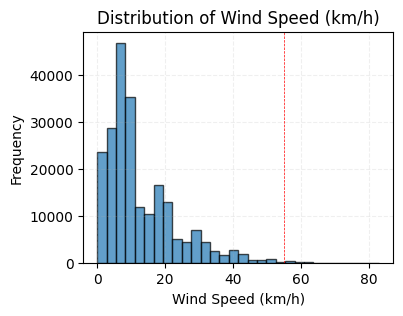

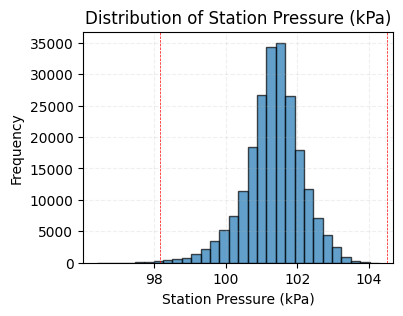

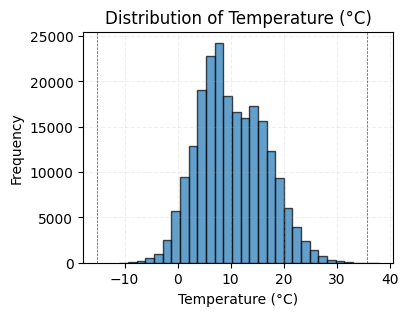

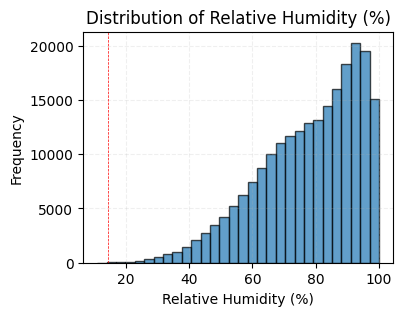

In [15]:
data = get_stn("COMOX A")
data_ws = data["Wind Spd (km/h)"]
data_pres = data["Stn Press (kPa)"]
data_temp = data["Temp (°C)"]
data_rh = data["Rel Hum (%)"]
plot_data_dist(data_ws, varname="Wind Speed (km/h)", lower_bound=0)
plot_data_dist(data_pres, varname="Station Pressure (kPa)")
plot_data_dist(data_temp, varname="Temperature (°C)")
plot_data_dist(data_rh, varname="Relative Humidity (%)", lower_bound=0, upper_bound=100)

In [18]:
# REMOVE OUTLIERS
for var in vars:
    df[var] = reject_outliers(df[var], threshold=ZSCORE_THRESHOLD)

In [19]:
# Find all stations that meet the coverage threshold for the given variable

WS_coverage_dict = {}
RH_coverage_dict = {}
P_coverage_dict = {}
T_coverage_dict = {}
Td_coverage_dict = {}

for i,stn in enumerate(stns):
    print(f"{i+1}/{len(stns)}")
    
    stn_data = get_stn(stn)

    WS_data = stn_data["Wind Spd (km/h)"]
    WS_coverage = np.count_nonzero(~np.isnan(WS_data)) / N
    if WS_coverage >= COVERAGE_THRESHOLD:
        WS_coverage_dict[stn] = WS_coverage

    RH_data = stn_data["Rel Hum (%)"]
    RH_coverage = np.count_nonzero(~np.isnan(RH_data)) / N
    if RH_coverage >= COVERAGE_THRESHOLD:
        RH_coverage_dict[stn] = RH_coverage

    T_data = stn_data["Temp (°C)"]
    T_coverage = np.count_nonzero(~np.isnan(T_data)) / N
    if T_coverage >= COVERAGE_THRESHOLD:
        T_coverage_dict[stn] = T_coverage

    Td_data = stn_data["Dew Point Temp (°C)"]
    Td_coverage = np.count_nonzero(~np.isnan(Td_data)) / N
    if Td_coverage >= COVERAGE_THRESHOLD:
        Td_coverage_dict[stn] = Td_coverage

    P_data = stn_data["Stn Press (kPa)"]
    P_coverage = np.count_nonzero(~np.isnan(P_data)) / N
    if P_coverage >= COVERAGE_THRESHOLD:
        P_coverage_dict[stn] = P_coverage

1/203
2/203
3/203
4/203
5/203
6/203
7/203
8/203
9/203
10/203
11/203
12/203
13/203
14/203
15/203
16/203
17/203
18/203
19/203
20/203
21/203
22/203
23/203
24/203
25/203
26/203
27/203
28/203
29/203
30/203
31/203
32/203
33/203
34/203
35/203
36/203
37/203
38/203
39/203
40/203
41/203
42/203
43/203
44/203
45/203
46/203
47/203
48/203
49/203
50/203
51/203
52/203
53/203
54/203
55/203
56/203
57/203
58/203
59/203
60/203
61/203
62/203
63/203
64/203
65/203
66/203
67/203
68/203
69/203
70/203
71/203
72/203
73/203
74/203
75/203
76/203
77/203
78/203
79/203
80/203
81/203
82/203
83/203
84/203
85/203
86/203
87/203
88/203
89/203
90/203
91/203
92/203
93/203
94/203
95/203
96/203
97/203
98/203
99/203
100/203
101/203
102/203
103/203
104/203
105/203
106/203
107/203
108/203
109/203
110/203
111/203
112/203
113/203
114/203
115/203
116/203
117/203
118/203
119/203
120/203
121/203
122/203
123/203
124/203
125/203
126/203
127/203
128/203
129/203
130/203
131/203
132/203
133/203
134/203
135/203
136/203
137/203
138/203
139/

In [33]:
q_stns_A = set(RH_coverage_dict.keys()) & set(T_coverage_dict.keys()) & set(P_coverage_dict.keys())
q_stns_B = set(Td_coverage_dict.keys()) & set(P_coverage_dict.keys())
print(f"Number of stations with adequate Wind Speed coverage: {len(WS_coverage_dict)}")
print(f"Number of stations with adequate (RH, T, and P) coverage: {len(q_stns_A)}")
print(f"Number of stations with adequate (Td and P) coverage: {len(q_stns_B)}")
print(f"Number of stations with both adequate (RH, T, P) and (Td, P) coverage: {len(q_stns_A & q_stns_B)}")

q_stns_A = list(q_stns_A)
q_stns_B = list(q_stns_B)

Number of stations with adequate Wind Speed coverage: 51
Number of stations with adequate (RH, T, and P) coverage: 21
Number of stations with adequate (Td and P) coverage: 21
Number of stations with both adequate (RH, T, P) and (Td, P) coverage: 21


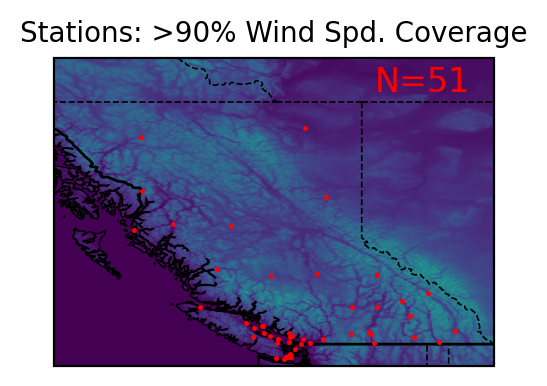

In [22]:
topography_hr = xr.open_dataset("/users/rpayne/data/topography/hr/HGT_orig.nc")
lon = topography_hr['XLONG'].squeeze()
lat = topography_hr['XLAT'].squeeze()
hgt = topography_hr['HGT'].squeeze()

# Create a figure
fig, ax = plt.subplots(subplot_kw={"projection": ccrs.PlateCarree()},figsize=(4,2),dpi=200)

# Plot using pcolormesh
mesh = ax.pcolormesh(lon, lat, hgt, transform=ccrs.PlateCarree(), shading='auto')
ax.add_feature(cfeature.BORDERS, linewidth=1)   # Country borders
provinc_bodr = cartopy.feature.NaturalEarthFeature(category='cultural', 
    name='admin_1_states_provinces_lines', scale='50m', facecolor='none', edgecolor='k')
ax.add_feature(provinc_bodr, linestyle='--', linewidth=0.6, edgecolor="k", zorder=10)
for stn in WS_coverage_dict.keys():
    lat, lon = stn_latlon[stn]
    ax.plot(lon, lat, marker='o', color='red', markersize=.8, transform=ccrs.PlateCarree())
ax.set_xlim(-134, -114)
ax.set_ylim(48, 62)
ax.text(-119.4, 60.5, f"N={len(WS_coverage_dict.keys())}", fontsize=12, transform=ccrs.PlateCarree(), color='red')

# Add coastlines and colorbar
ax.coastlines(linewidth=0.5)

ax.set_title(f"Stations: >{100*COVERAGE_THRESHOLD:.0f}% Wind Spd. Coverage", fontsize=10)
plt.show()

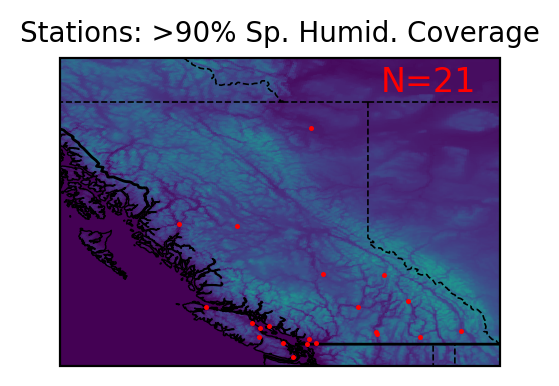

In [23]:
topography_hr = xr.open_dataset("/users/rpayne/data/topography/hr/HGT_orig.nc")
lon = topography_hr['XLONG'].squeeze()
lat = topography_hr['XLAT'].squeeze()
hgt = topography_hr['HGT'].squeeze()

# Create a figure
fig, ax = plt.subplots(subplot_kw={"projection": ccrs.PlateCarree()},figsize=(4,2),dpi=200)

# Plot using pcolormesh
mesh = ax.pcolormesh(lon, lat, hgt, transform=ccrs.PlateCarree(), shading='auto')
ax.add_feature(cfeature.BORDERS, linewidth=1)   # Country borders
provinc_bodr = cartopy.feature.NaturalEarthFeature(category='cultural', 
    name='admin_1_states_provinces_lines', scale='50m', facecolor='none', edgecolor='k')
ax.add_feature(provinc_bodr, linestyle='--', linewidth=0.6, edgecolor="k", zorder=10)
for stn in q_stns_A:
    lat, lon = stn_latlon[stn]
    ax.plot(lon, lat, marker='o', color='red', markersize=.8, transform=ccrs.PlateCarree())
ax.set_xlim(-134, -114)
ax.set_ylim(48, 62)
ax.text(-119.4, 60.5, f"N={len(q_stns_A)}", fontsize=12, transform=ccrs.PlateCarree(), color='red')

# Add coastlines and colorbar
ax.coastlines(linewidth=0.5)

ax.set_title(f"Stations: >{100*COVERAGE_THRESHOLD:.0f}% Sp. Humid. Coverage", fontsize=10)
plt.show()

Plotting for WILLIAMS LAKE A (1/21)
Plotting for WHITE ROCK CAMPBELL SCIENTIFIC (2/21)
Plotting for VICTORIA HARBOUR A (3/21)
Plotting for TERRACE A (4/21)
Plotting for SUMMERLAND CS (5/21)
Plotting for REVELSTOKE A (6/21)
Plotting for POWELL RIVER A (7/21)
Plotting for PORT HARDY A (8/21)
Plotting for PORT ALBERNI (AUT) (9/21)
Plotting for PITT MEADOWS CS (10/21)
Plotting for PENTICTON A (11/21)
Plotting for NANAIMO A (12/21)
Plotting for KAMLOOPS A (13/21)
Plotting for FORT NELSON A (14/21)
Plotting for CRANBROOK A (15/21)
Plotting for COMOX A (16/21)
Plotting for CASTLEGAR A (17/21)
Plotting for CAMPBELL RIVER A (18/21)
Plotting for BURNS LAKE DECKER LAKE (19/21)
Plotting for BLUE RIVER CS (20/21)
Plotting for ABBOTSFORD A (21/21)


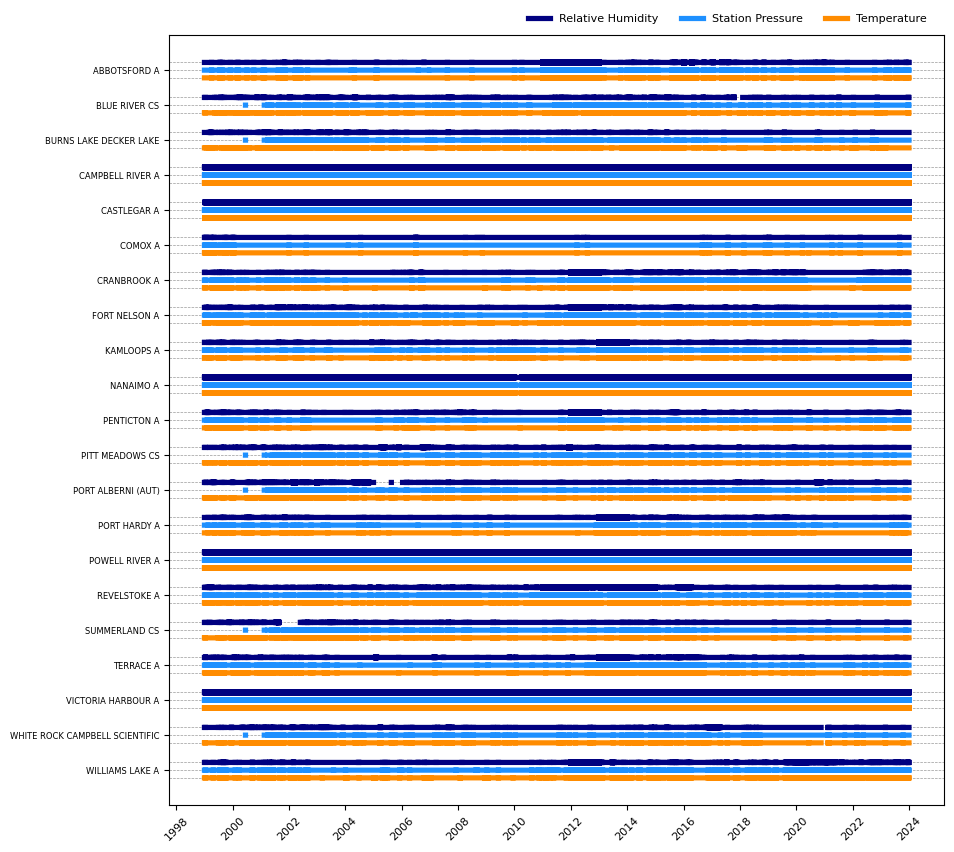

In [34]:
plt.figure(figsize=(10, 10))
plt.yticks(np.arange(len(q_stns_A)), sorted(q_stns_A, reverse=True), fontsize=6)
plt.ylim(-1, len(q_stns_A))
plt.xticks(
    ticks=pd.date_range(start='1990-01-01', end='2026-01-01', freq='2YS'),
    labels=[str(y.year) for y in pd.date_range(start='1990-01-01', end='2026-01-01', freq='2YS')],
    rotation=45,
    fontsize=8
)
colors = ["navy", "dodgerblue", "darkorange"]

di = .22
lw = 3.75
for i,stn in enumerate(sorted(q_stns_A, reverse=True)):
    print(f"Plotting for {stn} ({i+1}/{len(q_stns_A)})")

    stn_data = get_stn(stn)
    rh = stn_data["Rel Hum (%)"]
    pres = stn_data["Stn Press (kPa)"]
    temp = stn_data["Temp (°C)"]
    rh = rh.where(rh.isna(), i+di)
    pres = pres.where(pres.isna(), i)
    temp = temp.where(temp.isna(), i-di)

    plt.axhline(y=i, color='black', linewidth=0.5, linestyle='--', alpha=0.4)
    plt.axhline(y=i+di, color='black', linewidth=0.5, linestyle='--', alpha=0.4)
    plt.axhline(y=i-di, color='black', linewidth=0.5, linestyle='--', alpha=0.4)
    if i == 0:
        plt.plot(rh.index, rh, drawstyle='steps-post', linewidth=lw, color=colors[0], label='Relative Humidity')
        plt.plot(pres.index, pres, drawstyle='steps-post', linewidth=lw, color=colors[1], label='Station Pressure')
        plt.plot(temp.index, temp, drawstyle='steps-post', linewidth=lw, color=colors[2], label='Temperature')
    else:
        plt.plot(rh.index, rh, drawstyle='steps-post', linewidth=lw, color=colors[0])
        plt.plot(pres.index, pres, drawstyle='steps-post', linewidth=lw, color=colors[1])
        plt.plot(temp.index, temp, drawstyle='steps-post', linewidth=lw, color=colors[2])

plt.legend(loc='upper left', fontsize=8, ncol=3, bbox_to_anchor=(0.45, 1.04), frameon=False)
# plt.tight_layout()
plt.show()

Plotting for WILLIAMS LAKE A (1/21)
Plotting for WHITE ROCK CAMPBELL SCIENTIFIC (2/21)
Plotting for VICTORIA HARBOUR A (3/21)
Plotting for TERRACE A (4/21)
Plotting for SUMMERLAND CS (5/21)
Plotting for REVELSTOKE A (6/21)
Plotting for POWELL RIVER A (7/21)
Plotting for PORT HARDY A (8/21)
Plotting for PORT ALBERNI (AUT) (9/21)
Plotting for PITT MEADOWS CS (10/21)
Plotting for PENTICTON A (11/21)
Plotting for NANAIMO A (12/21)
Plotting for KAMLOOPS A (13/21)
Plotting for FORT NELSON A (14/21)
Plotting for CRANBROOK A (15/21)
Plotting for COMOX A (16/21)
Plotting for CASTLEGAR A (17/21)
Plotting for CAMPBELL RIVER A (18/21)
Plotting for BURNS LAKE DECKER LAKE (19/21)
Plotting for BLUE RIVER CS (20/21)
Plotting for ABBOTSFORD A (21/21)


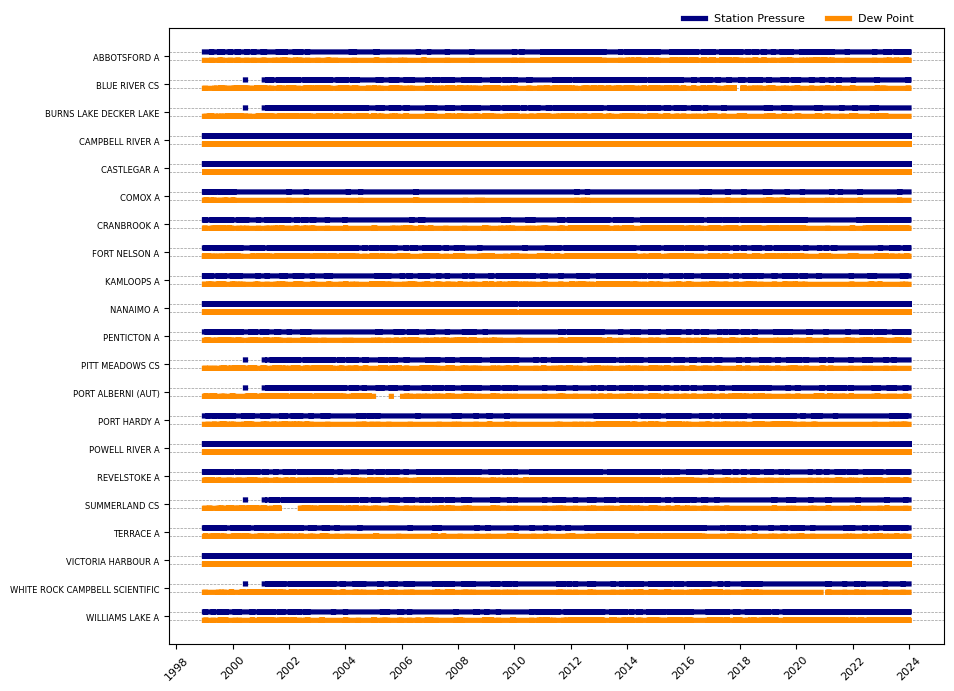

In [35]:
plt.figure(figsize=(10, 8))
plt.yticks(np.arange(len(q_stns_A)), sorted(q_stns_A, reverse=True), fontsize=6)
plt.ylim(-1, len(q_stns_A))
plt.xticks(
    ticks=pd.date_range(start='1990-01-01', end='2026-01-01', freq='2YS'),
    labels=[str(y.year) for y in pd.date_range(start='1990-01-01', end='2026-01-01', freq='2YS')],
    rotation=45,
    fontsize=8
)
colors = ["navy", "dodgerblue", "darkorange"]

di = .15
lw = 3.75
for i,stn in enumerate(sorted(q_stns_A, reverse=True)):
    print(f"Plotting for {stn} ({i+1}/{len(q_stns_A)})")

    stn_data = get_stn(stn)
    pres = stn_data["Stn Press (kPa)"]
    dewtemp = stn_data["Dew Point Temp (°C)"]
    pres = pres.where(pres.isna(), i+di)
    dewtemp = dewtemp.where(dewtemp.isna(), i-di)

    plt.axhline(y=i+di, color='black', linewidth=0.5, linestyle='--', alpha=0.4)
    plt.axhline(y=i-di, color='black', linewidth=0.5, linestyle='--', alpha=0.4)
    if i == 0:
        plt.plot(pres.index, pres, drawstyle='steps-post', linewidth=lw, color=colors[0], label='Station Pressure')
        plt.plot(dewtemp.index, dewtemp, drawstyle='steps-post', linewidth=lw, color=colors[2], label='Dew Point')
    else:
        plt.plot(pres.index, pres, drawstyle='steps-post', linewidth=lw, color=colors[0])
        plt.plot(dewtemp.index, dewtemp, drawstyle='steps-post', linewidth=lw, color=colors[2])

plt.legend(loc='upper left', fontsize=8, ncol=3, bbox_to_anchor=(0.65, 1.04), frameon=False)
# plt.tight_layout()
plt.show()

Plotting Dew Point Temp (°C) for WILLIAMS LAKE A (1/34)


/users/rpayne/venv/general/lib/python3.10/site-packages/pandas/plotting/_matplotlib/core.py:981: UserWarning: This axis already has a converter set and is updating to a potentially incompatible converter
  return ax.plot(*args, **kwds)


Plotting Dew Point Temp (°C) for WHITE ROCK CAMPBELL SCIENTIFIC (2/34)
Plotting Dew Point Temp (°C) for WEST VANCOUVER AUT (3/34)
Plotting Dew Point Temp (°C) for VICTORIA UNIVERSITY CS (4/34)
Plotting Dew Point Temp (°C) for VICTORIA HARBOUR A (5/34)
Plotting Dew Point Temp (°C) for VICTORIA GONZALES CS (6/34)
Plotting Dew Point Temp (°C) for TERRACE A (7/34)
Plotting Dew Point Temp (°C) for SUMMERLAND CS (8/34)
Plotting Dew Point Temp (°C) for SISTERS ISLAND (9/34)
Plotting Dew Point Temp (°C) for SALMON ARM CS (10/34)
Plotting Dew Point Temp (°C) for REVELSTOKE A (11/34)
Plotting Dew Point Temp (°C) for PUNTZI MOUNTAIN (AUT) (12/34)
Plotting Dew Point Temp (°C) for POWELL RIVER A (13/34)
Plotting Dew Point Temp (°C) for PORT HARDY A (14/34)
Plotting Dew Point Temp (°C) for PORT ALBERNI (AUT) (15/34)
Plotting Dew Point Temp (°C) for PITT MEADOWS CS (16/34)
Plotting Dew Point Temp (°C) for PENTICTON A (17/34)
Plotting Dew Point Temp (°C) for PEMBERTON AIRPORT CS (18/34)
Plotting Dew P

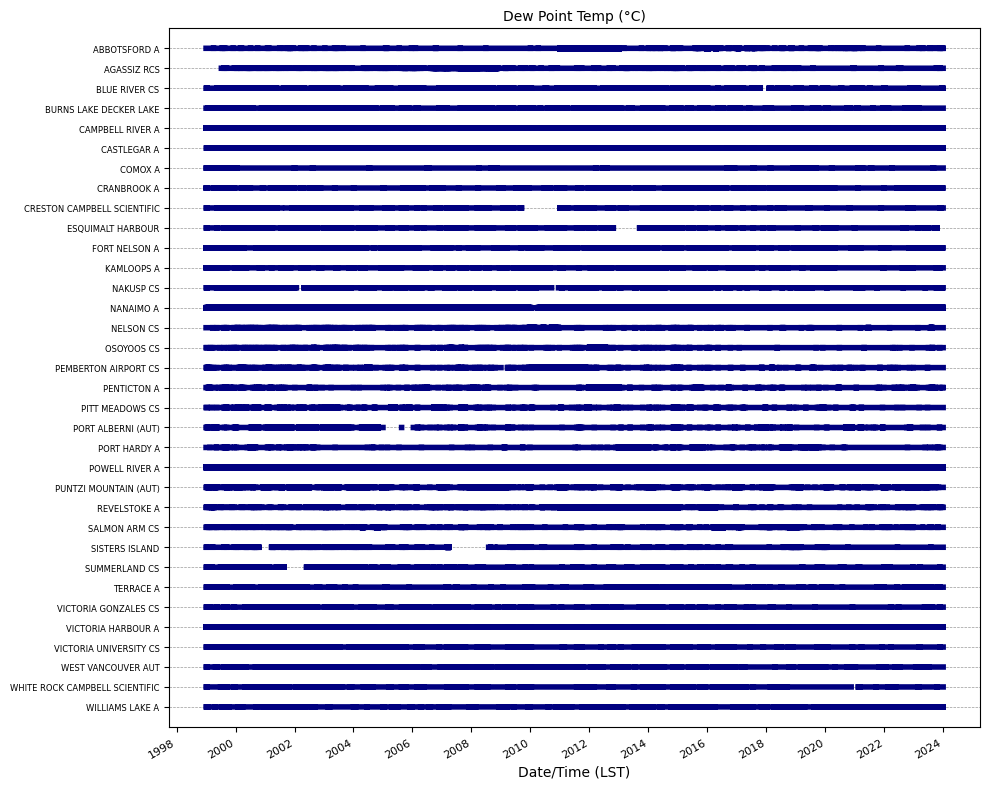

In [37]:
plt.figure(figsize=(10, 8))
plt.yticks(np.arange(len(Td_coverage_dict.keys())), sorted(list(Td_coverage_dict.keys()), reverse=True), fontsize=6)
plt.ylim(-1, len(Td_coverage_dict.keys()))
plt.xticks(
    ticks=pd.date_range(start='1990-01-01', end='2026-01-01', freq='2YS'),
    labels=[str(y.year) for y in pd.date_range(start='1990-01-01', end='2026-01-01', freq='2YS')],
    rotation=45,
    fontsize=8
)
color = ["navy", "darkorange"]

var = "Dew Point Temp (°C)"
for i,stn in enumerate(sorted(list(Td_coverage_dict.keys()), reverse=True)):
    print(f"Plotting {var} for {stn} ({i+1}/{len(Td_coverage_dict.keys())})")
    data = get_stn(stn)[var]
    data = data.where(data.isna(), i)
    plt.axhline(y=i, color='black', linewidth=0.5, linestyle='--', alpha=0.4)
    data.plot(ax=plt.gca(), label=stn, drawstyle='steps-post', linewidth=4, color='navy')

plt.title(f"{var}", fontsize=10)
plt.tight_layout()
plt.show()

Plotting Wind Spd (km/h) for WILLIAMS LAKE A (1/51)


/users/rpayne/venv/general/lib/python3.10/site-packages/pandas/plotting/_matplotlib/core.py:981: UserWarning: This axis already has a converter set and is updating to a potentially incompatible converter
  return ax.plot(*args, **kwds)


Plotting Wind Spd (km/h) for WHITE ROCK CAMPBELL SCIENTIFIC (2/51)
Plotting Wind Spd (km/h) for WEST VANCOUVER AUT (3/51)
Plotting Wind Spd (km/h) for VICTORIA UNIVERSITY CS (4/51)
Plotting Wind Spd (km/h) for VICTORIA HARBOUR A (5/51)
Plotting Wind Spd (km/h) for VICTORIA GONZALES CS (6/51)
Plotting Wind Spd (km/h) for TERRACE A (7/51)
Plotting Wind Spd (km/h) for SUMMERLAND CS (8/51)
Plotting Wind Spd (km/h) for STEWART A (9/51)
Plotting Wind Spd (km/h) for SISTERS ISLAND (10/51)
Plotting Wind Spd (km/h) for SHERINGHAM POINT (11/51)
Plotting Wind Spd (km/h) for SATURNA ISLAND CS (12/51)
Plotting Wind Spd (km/h) for SANDHEADS CS (13/51)
Plotting Wind Spd (km/h) for SALMON ARM CS (14/51)
Plotting Wind Spd (km/h) for REVELSTOKE A (15/51)
Plotting Wind Spd (km/h) for RACE ROCKS (16/51)
Plotting Wind Spd (km/h) for PUNTZI MOUNTAIN (AUT) (17/51)
Plotting Wind Spd (km/h) for PRINCETON CS (18/51)
Plotting Wind Spd (km/h) for POWELL RIVER A (19/51)
Plotting Wind Spd (km/h) for PORT HARDY A (2

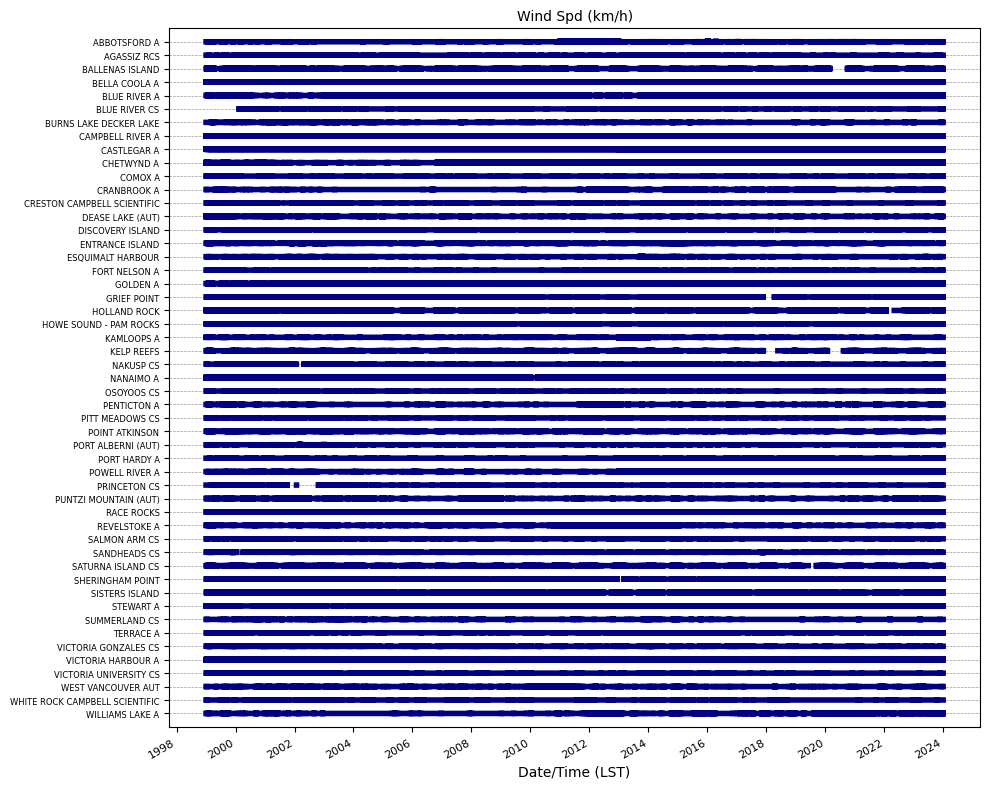

In [38]:
plt.figure(figsize=(10, 8))
plt.yticks(np.arange(len(WS_coverage_dict.keys())), sorted(list(WS_coverage_dict.keys()), reverse=True), fontsize=6)
plt.ylim(-1, len(WS_coverage_dict.keys()))
plt.xticks(
    ticks=pd.date_range(start='1990-01-01', end='2026-01-01', freq='2YS'),
    labels=[str(y.year) for y in pd.date_range(start='1990-01-01', end='2026-01-01', freq='2YS')],
    rotation=45,
    fontsize=8
)
color = ["navy", "darkorange"]

var = "Wind Spd (km/h)"
for i,stn in enumerate(sorted(list(WS_coverage_dict.keys()), reverse=True)):
    print(f"Plotting {var} for {stn} ({i+1}/{len(WS_coverage_dict.keys())})")
    data = get_stn(stn)[var]
    data = data.where(data.isna(), i)
    plt.axhline(y=i, color='black', linewidth=0.5, linestyle='--', alpha=0.4)
    data.plot(ax=plt.gca(), label=stn, drawstyle='steps-post', linewidth=4, color="navy")

plt.title(f"{var}", fontsize=10)
plt.tight_layout()
plt.show()

Plotting 1/51
Plotting 2/51
Plotting 3/51
Plotting 4/51
Plotting 5/51
Plotting 6/51
Plotting 7/51
Plotting 8/51
Plotting 9/51
Plotting 10/51
Plotting 11/51
Plotting 12/51
Plotting 13/51
Plotting 14/51
Plotting 15/51
Plotting 16/51
Plotting 17/51
Plotting 18/51
Plotting 19/51
Plotting 20/51
Plotting 21/51
Plotting 22/51
Plotting 23/51
Plotting 24/51
Plotting 25/51
Plotting 26/51
Plotting 27/51
Plotting 28/51
Plotting 29/51
Plotting 30/51
Plotting 31/51
Plotting 32/51
Plotting 33/51
Plotting 34/51
Plotting 35/51
Plotting 36/51
Plotting 37/51
Plotting 38/51
Plotting 39/51
Plotting 40/51
Plotting 41/51
Plotting 42/51
Plotting 43/51
Plotting 44/51
Plotting 45/51
Plotting 46/51
Plotting 47/51
Plotting 48/51
Plotting 49/51
Plotting 50/51
Plotting 51/51


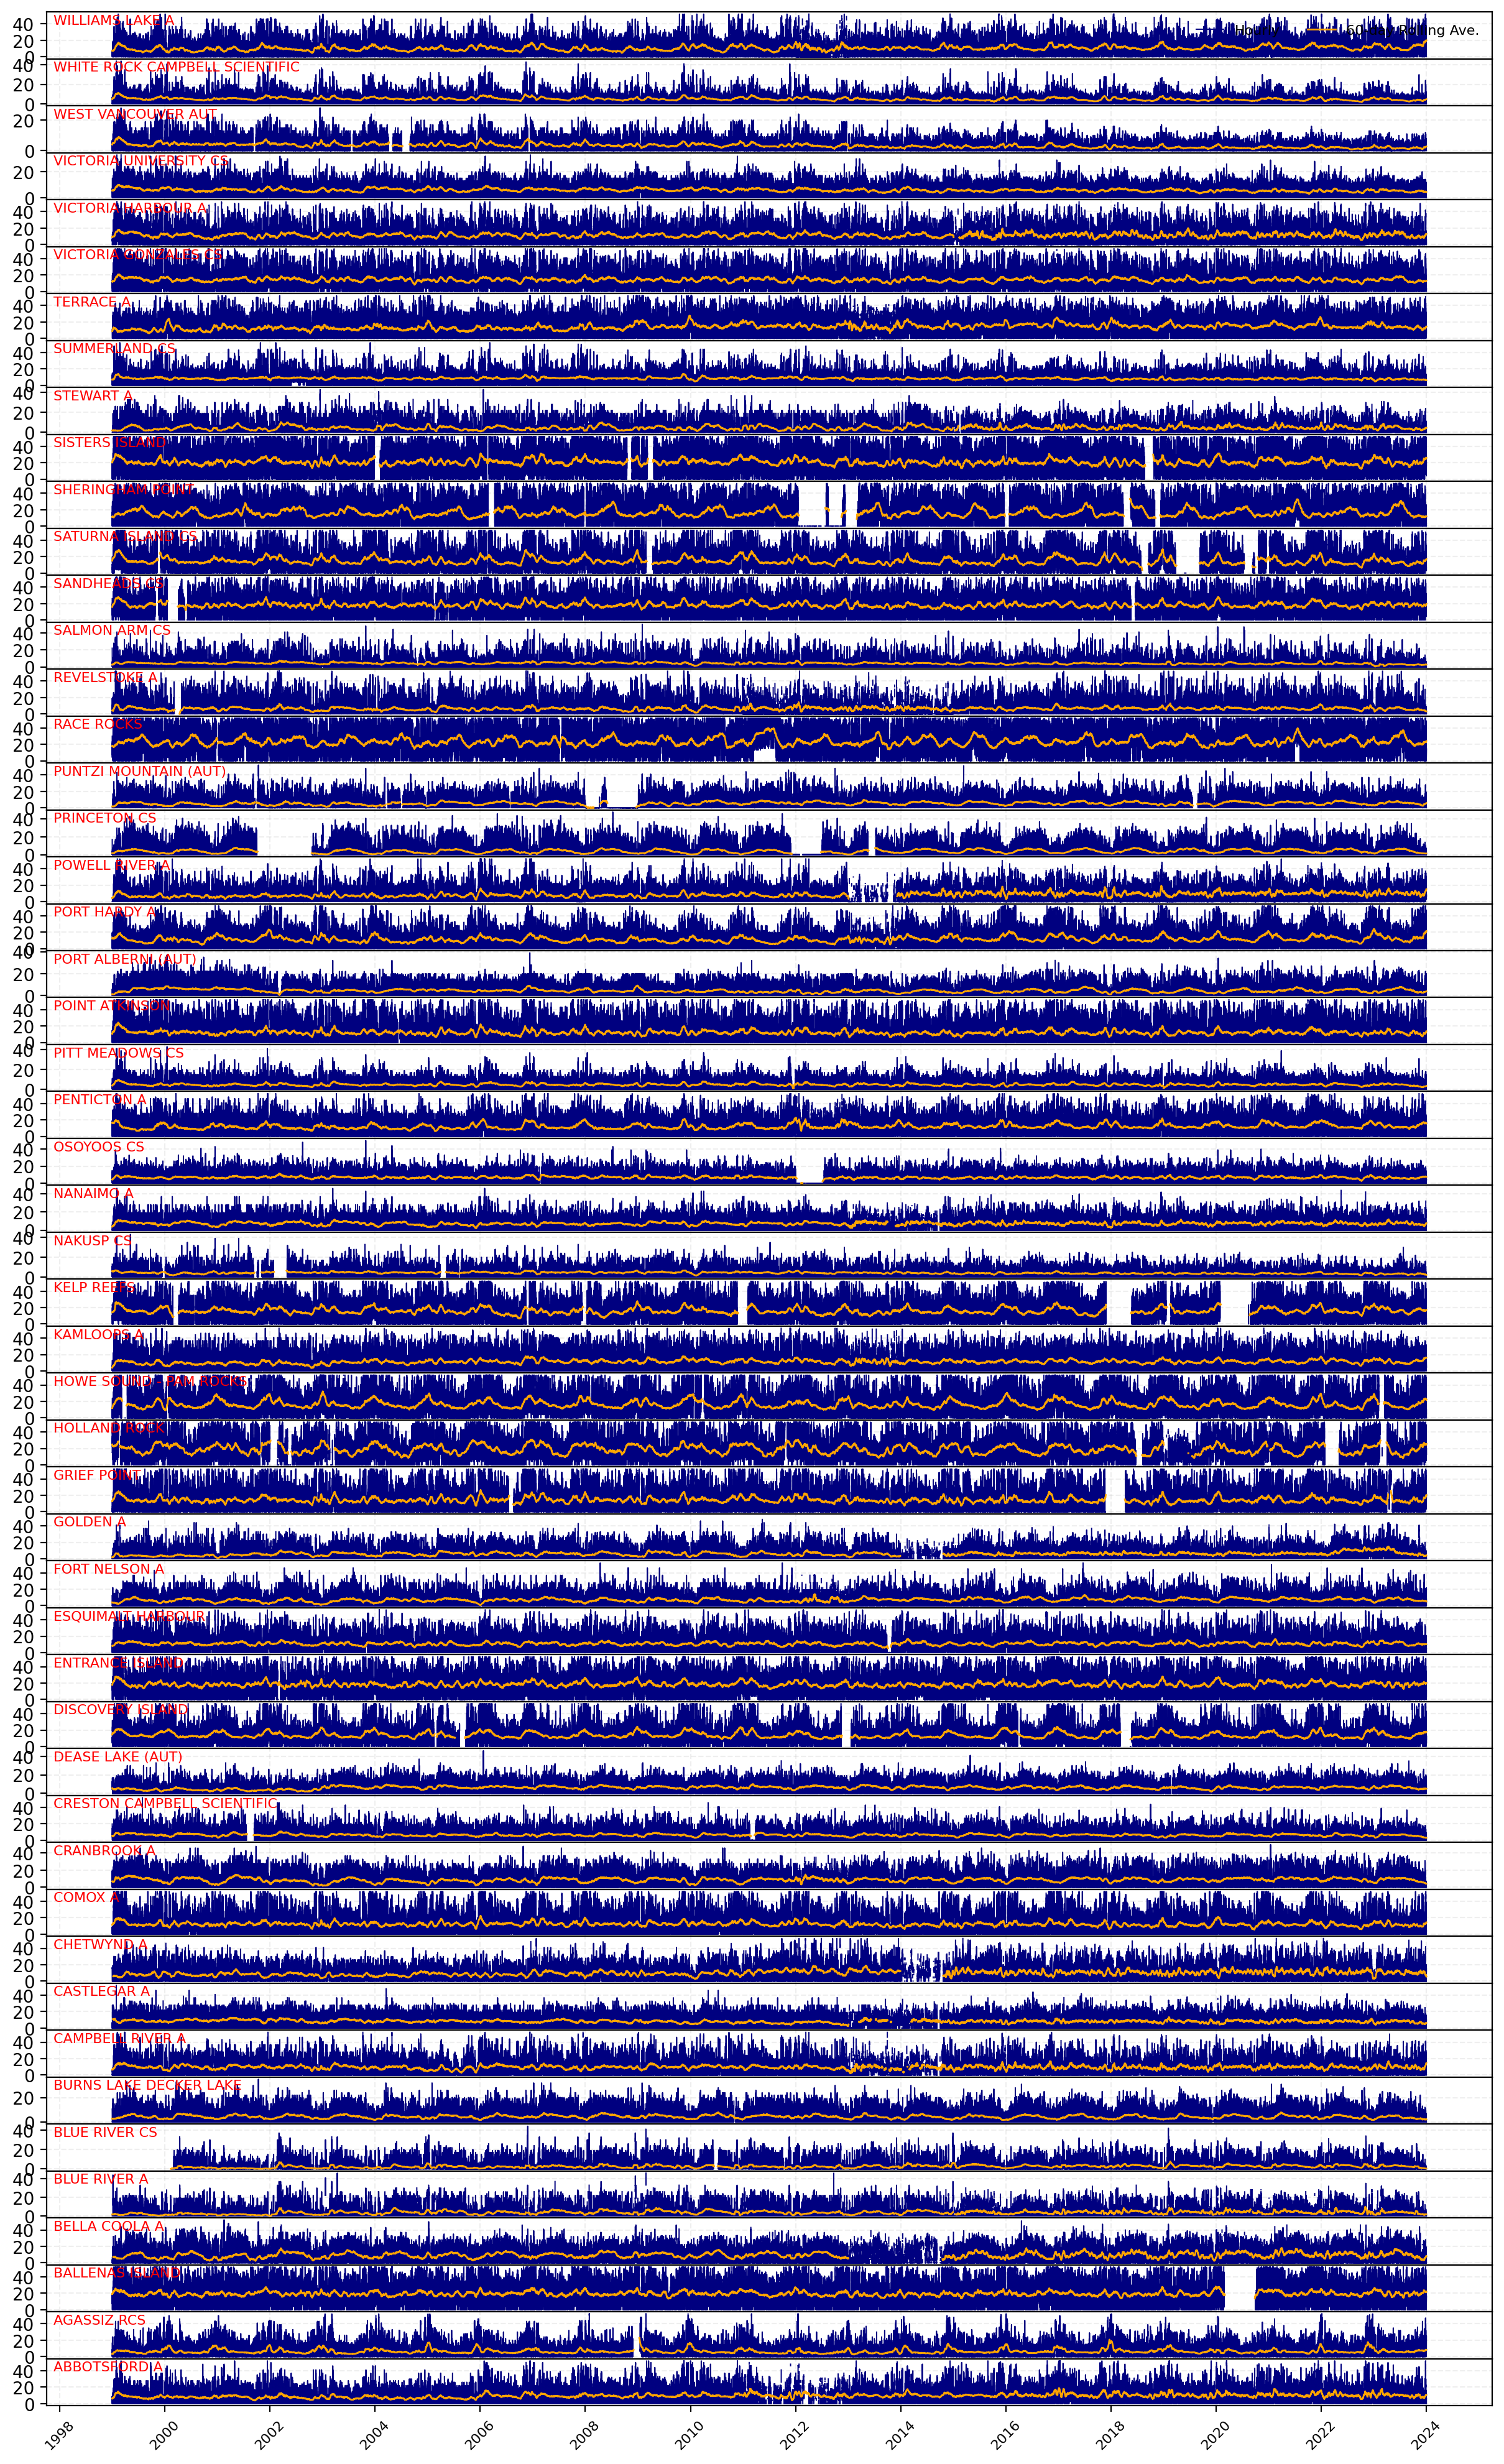

: 

In [ ]:
fig, axes = plt.subplots(ncols=1, nrows=len(WS_coverage_dict.keys()), figsize=(15, 25), sharex=True, dpi=200)
plt.subplots_adjust(hspace=0)
for i,ax in enumerate(axes):
    print(f"Plotting {i+1}/{len(WS_coverage_dict.keys())}")
    ax.set_xticks(
        ticks=pd.date_range(start='1990-01-01', end='2026-01-01', freq='2YS'),
        labels=[str(y.year) for y in pd.date_range(start='1990-01-01', end='2026-01-01', freq='2YS')],
        rotation=45,
        fontsize=8
    )
    ax.set_yticks(np.arange(0,80,20))
    ax.grid(True, alpha=.2, linestyle='--')
    stn = sorted(list(WS_coverage_dict.keys()), reverse=True)[i]
    stn_data = get_stn(stn)
    stn_data_rolling = stn_data['Wind Spd (km/h)'].rolling(window=24*30*1, center=True, min_periods=24*10).mean()
    ax.plot(stn_data.index, stn_data["Wind Spd (km/h)"], label="Hourly", color="navy", lw=.7)
    ax.plot(stn_data_rolling.index, stn_data_rolling, label=f"60-day Rolling Ave.", color="orange", lw=1.)
    ax.text(0.005, 0.95, stn, transform=ax.transAxes, fontsize=8, color='red', ha='left', va='top')
    if i == 0:
        ax.legend(loc='upper right', fontsize=8, ncol=2, frameon=False)
    if i < len(WS_coverage_dict.keys()) - 1:
        ax.set_xticklabels([])
plt.show()